In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('1688640705_hr_comma_sep.xlsx')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
df.shape

(14999, 10)

In [4]:
df.columns.to_list()

['satisfaction_level',
 'last_evaluation',
 'number_project',
 'average_montly_hours',
 'time_spend_company',
 'Work_accident',
 'left',
 'promotion_last_5years',
 'sales',
 'salary']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [7]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [8]:
df = df.rename(columns={'sales' : 'department'})

In [9]:
df['department'].unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [10]:
df['department']=np.where(df['department'] =='support', 'technical', df['department'])


In [11]:
depart = pd.get_dummies(df['department'], prefix='department', drop_first=True )
sales = pd.get_dummies(df['salary'], prefix='salary', drop_first=True )

In [12]:
df = df.join(depart)
df = df.join(sales)

In [13]:
cols = ['department', 'salary']
df.drop(cols, axis=1, inplace=True)

In [14]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,True,False


In [15]:
df.shape

(14999, 18)

<Axes: xlabel='satisfaction_level', ylabel='left'>

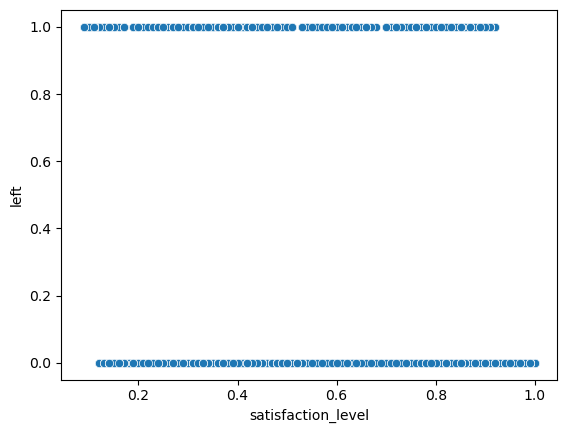

In [16]:
sns.scatterplot(x=df['satisfaction_level'], y=df['left'])

<Axes: xlabel='last_evaluation', ylabel='left'>

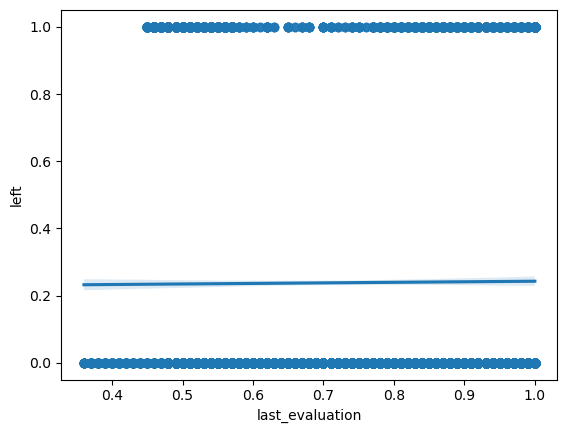

In [17]:
sns.regplot(x=df['last_evaluation'], y=df['left'])

/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_10777/3322082836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/b7/mp5qcyln1s773hcgklkfyq1c0000gn/T/ipykernel_10777/3322082836.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[col])
/var/folders/b7/mp5qcy

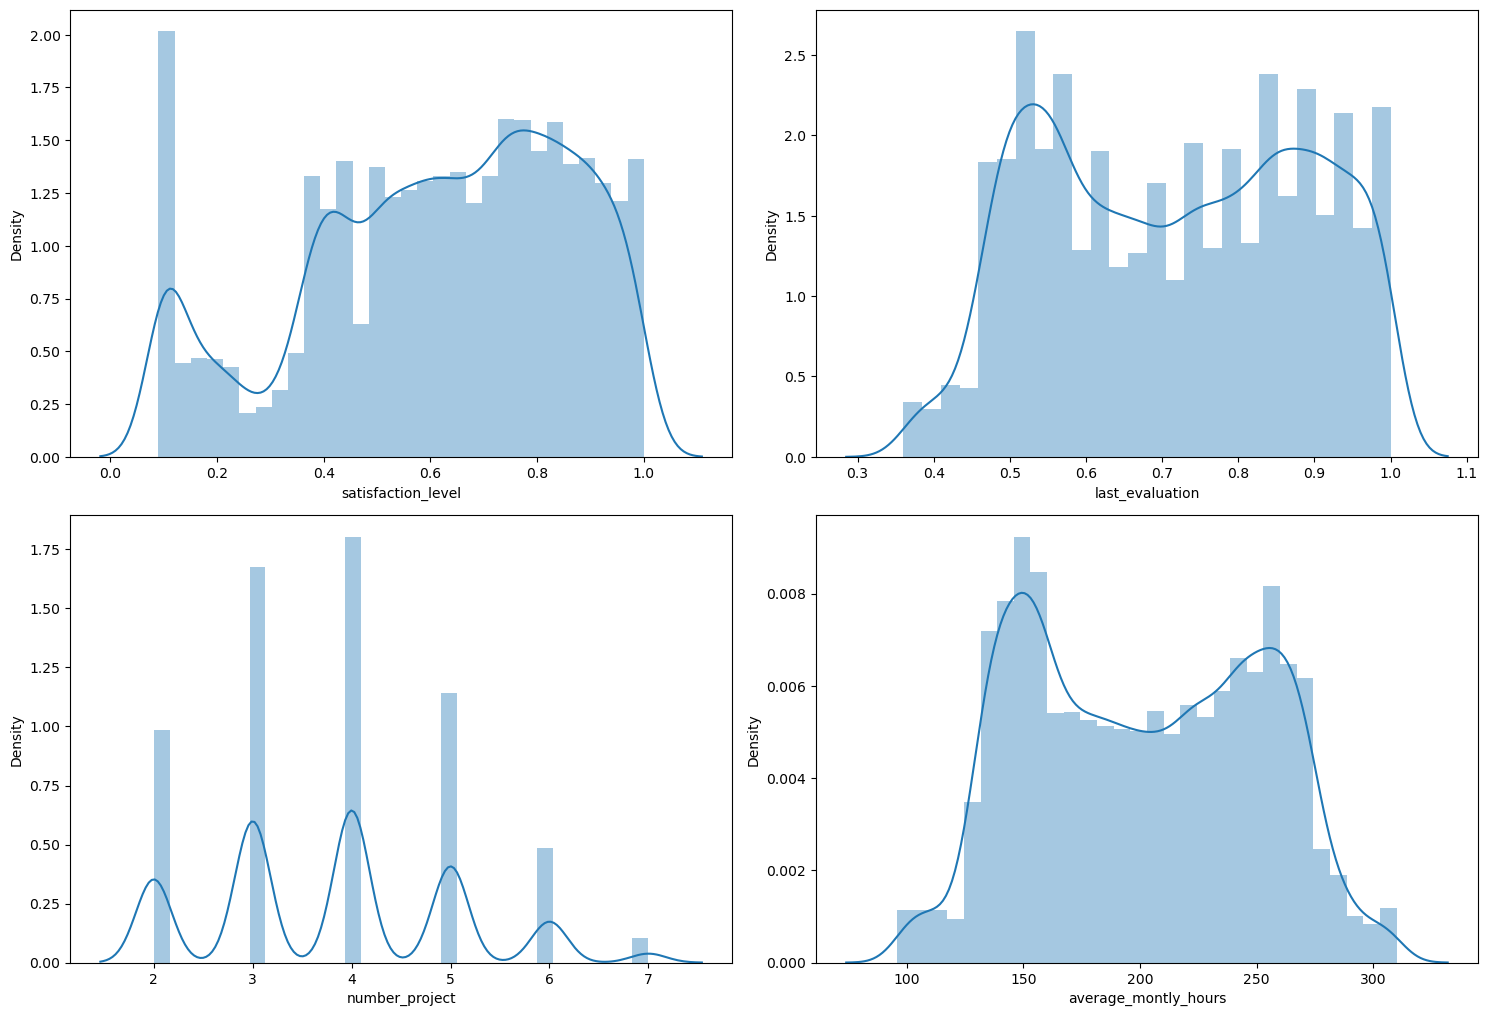

In [18]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.distplot(df[col])
    plt_num += 1
plt.tight_layout()

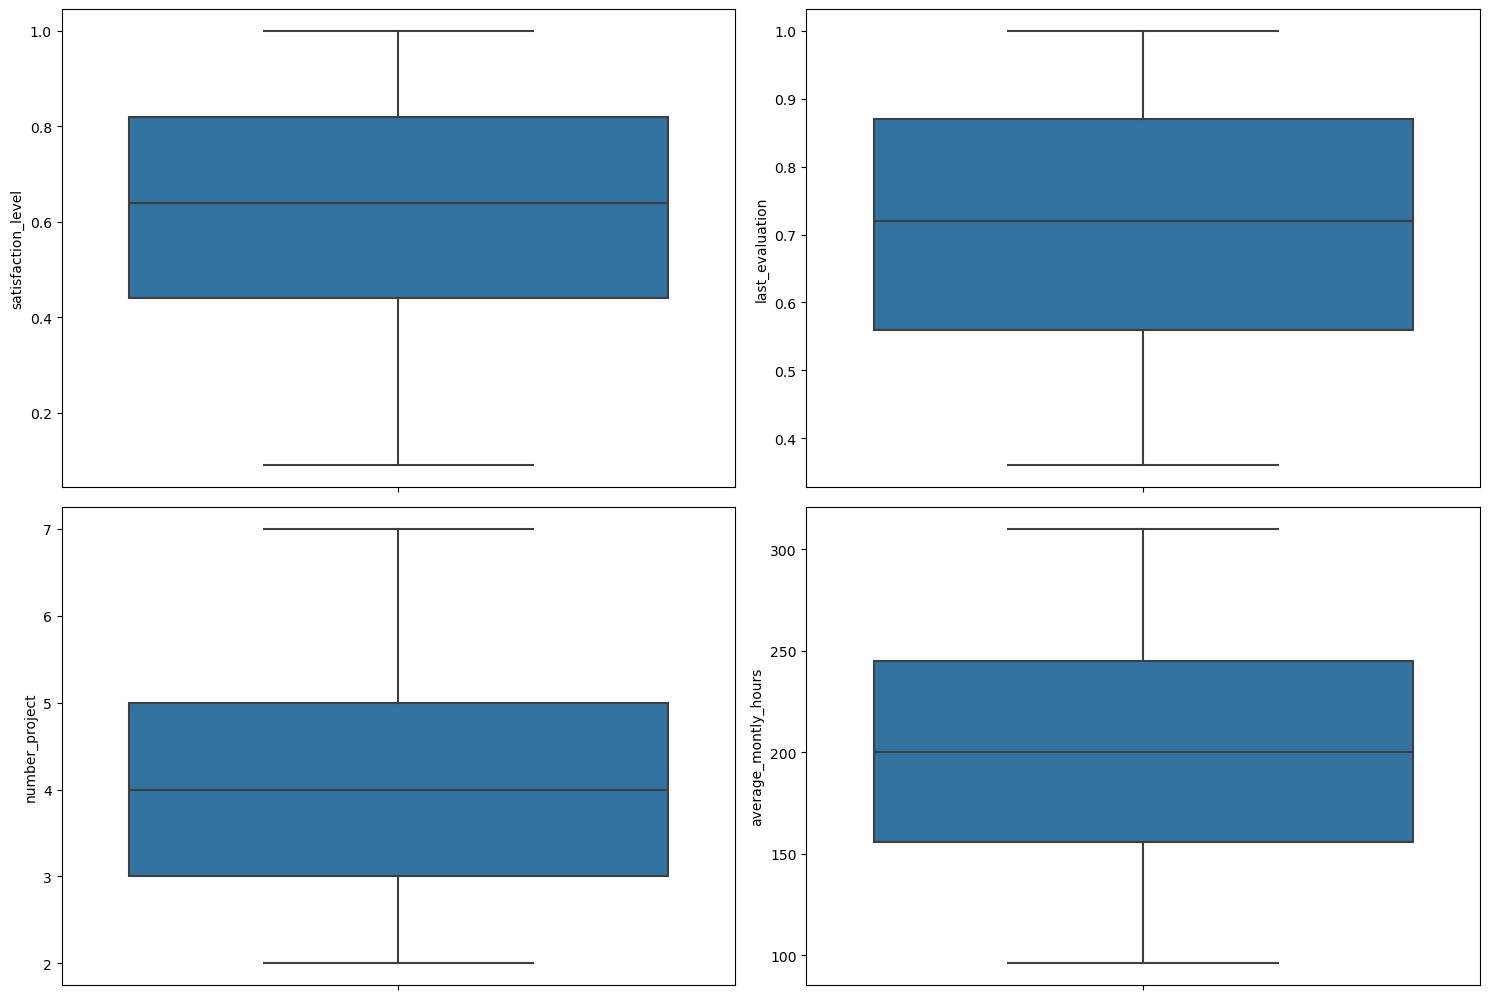

In [19]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.boxplot(y=df[col])
    plt_num += 1
plt.tight_layout()

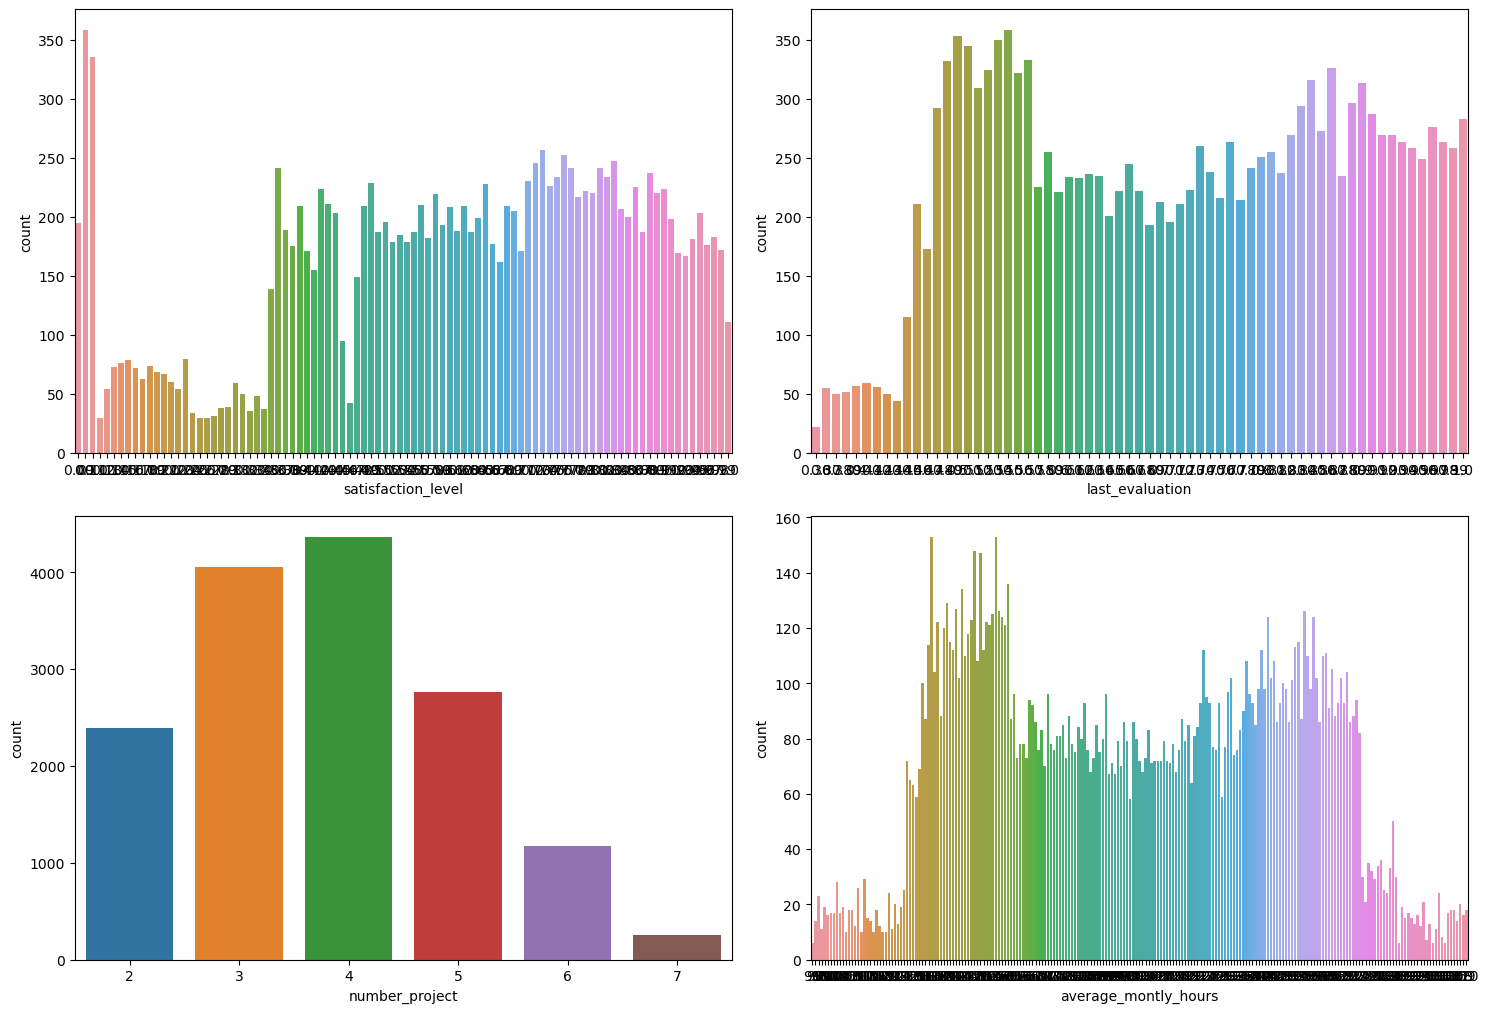

In [21]:
plt.figure(figsize=(15,25))
plt_num =1

for col in df.columns:
    if plt_num < 5:
        plt.subplot(5,2,plt_num)
        sns.countplot(x=df[col])
    plt_num += 1
plt.tight_layout()

<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_functio

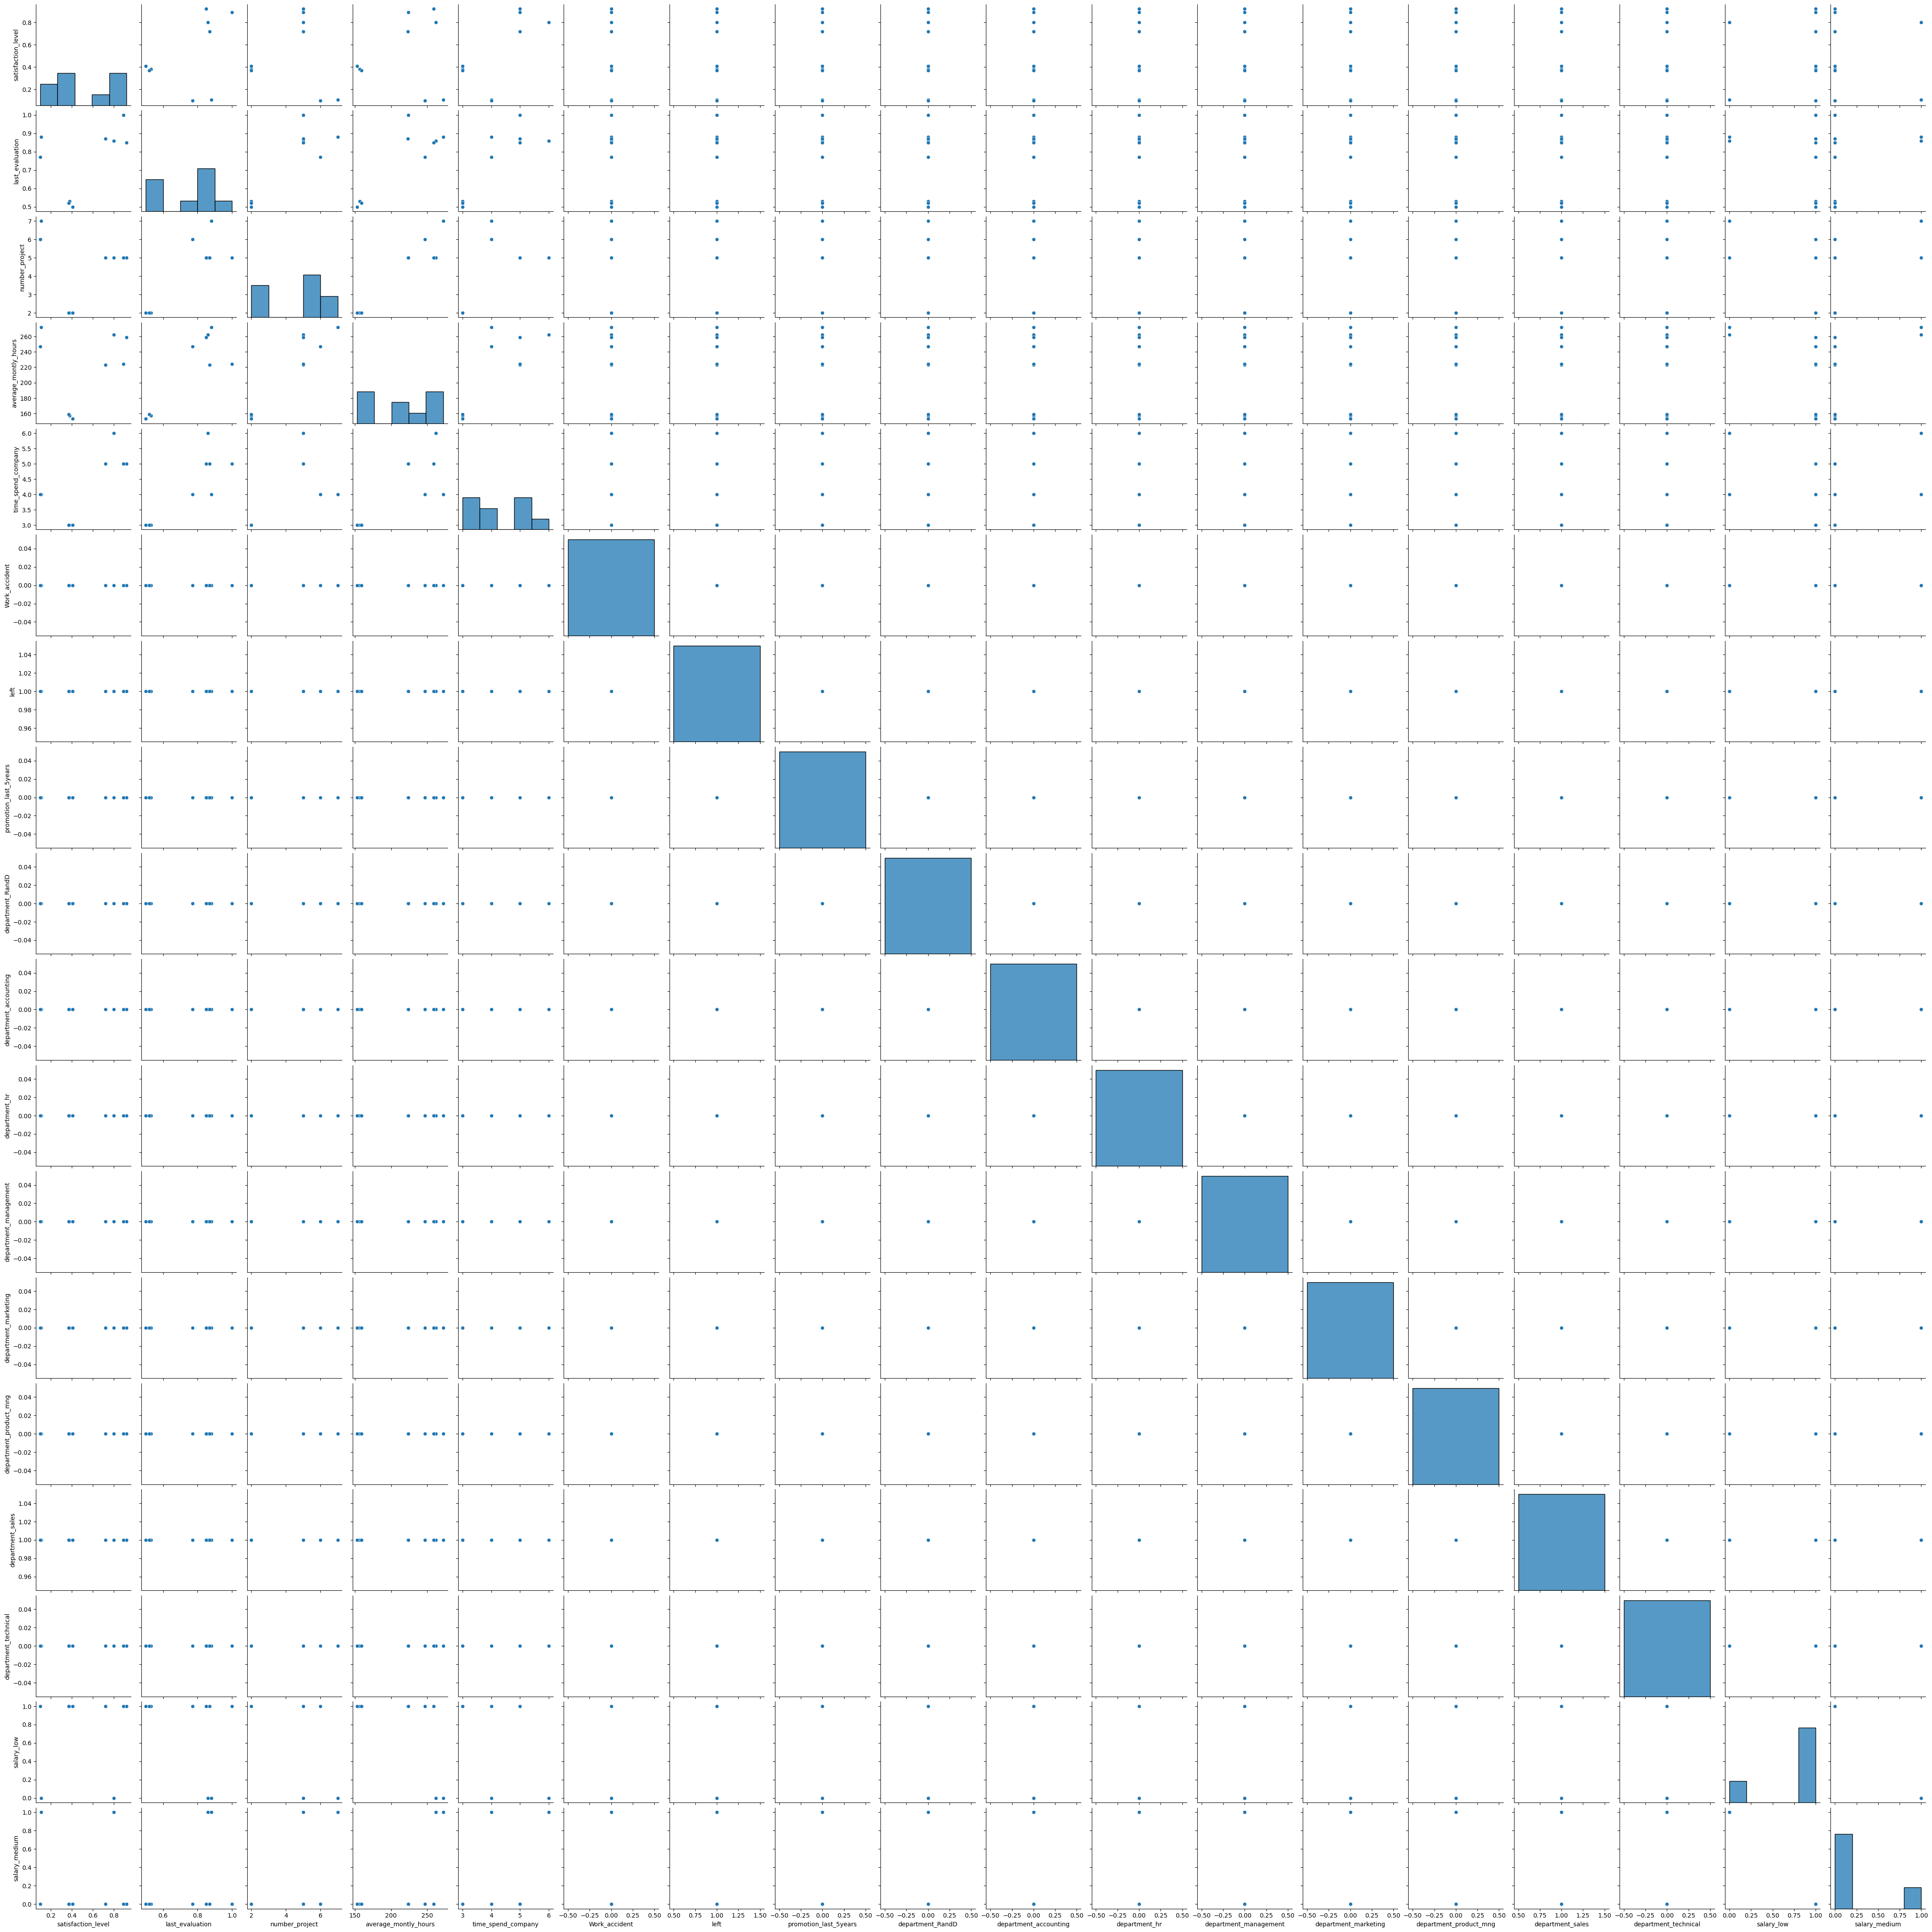

In [23]:
sns.pairplot(data=df[:9])

<Axes: >

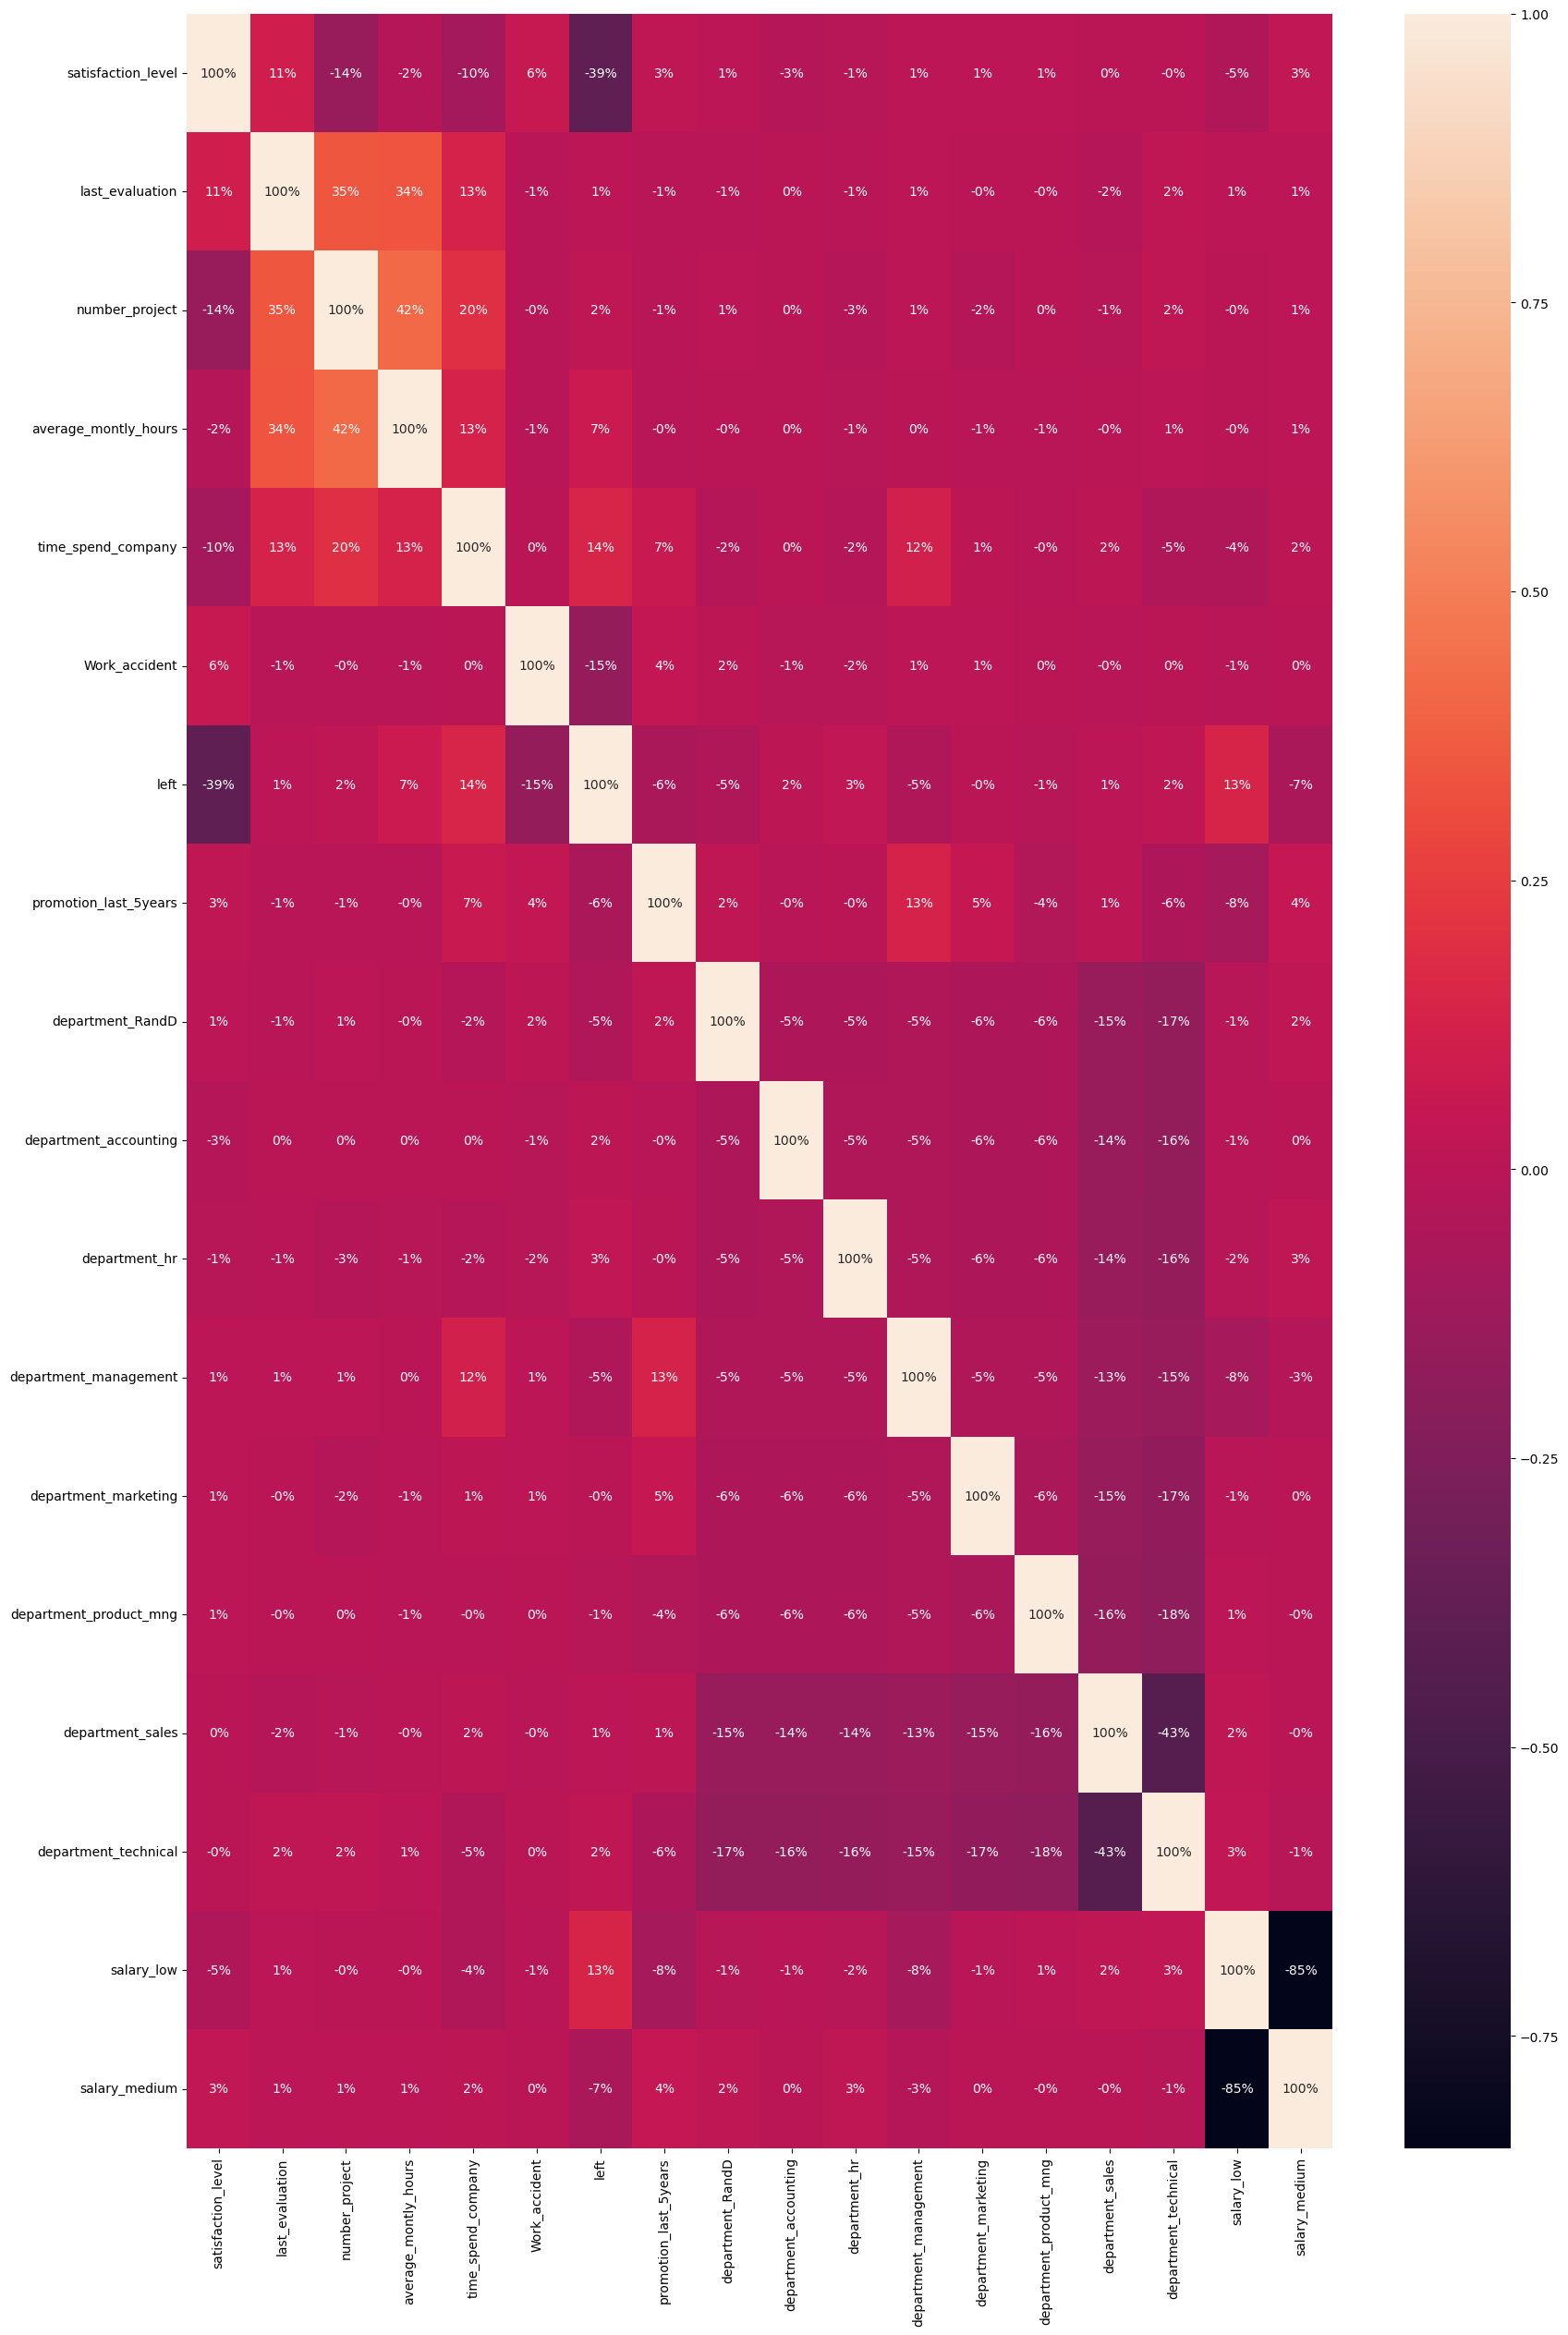

In [26]:
plt.figure(figsize=(20,30))
sns.heatmap(df.corr(), annot=True, fmt='.0%')

In [32]:
X = df.drop('left', axis=1)
y = df['left']

In [33]:
len(X.columns)

17

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


X = df.drop('left', axis=1)
y = df['left']

model = LogisticRegression(max_iter=1000)  # Increase max_iter for convergence
rfe = RFE(estimator=model, n_features_to_select=10)

rfe = rfe.fit(X, y)
print("Selected Features:", rfe.support_)
print("Feature Ranking:", rfe.ranking_)


Selected Features: [ True  True False False  True  True  True  True False  True  True False
 False False False  True  True]
Feature Ranking: [1 1 2 7 1 1 1 1 4 1 1 5 8 6 3 1 1]


In [41]:
X.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'promotion_last_5years', 'department_RandD', 'department_accounting',
       'department_hr', 'department_management', 'department_marketing',
       'department_product_mng', 'department_sales', 'department_technical',
       'salary_low', 'salary_medium'],
      dtype='object')

In [42]:
new_cols = ['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 'department_RandD',
       'department_hr', 'department_management', 'salary_low', 'salary_medium']

In [43]:
X = df[new_cols]
y = df['left']

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

In [45]:
from sklearn.linear_model import LogisticRegression

model_logistic = LogisticRegression()

In [46]:
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [47]:
model_logistic.score(X_train, y_train)

0.7702638346509192

In [48]:
model_logistic.score(X_test, y_test)

0.7664444444444445

In [51]:
from sklearn.tree import DecisionTreeClassifier
model_tree = DecisionTreeClassifier()

In [52]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [53]:
model_tree.score(X_train, y_train)

0.9967615963425088

In [54]:
model_tree.score(X_test, y_test)

0.9695555555555555

In [55]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

In [56]:
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
model_rf.score(X_train, y_train)

0.9967615963425088

In [58]:
model_rf.score(X_test, y_test)

0.9864444444444445

In [59]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3439
           1       0.97      0.97      0.97      1061

    accuracy                           0.99      4500
   macro avg       0.98      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



Text(0.5, 1.0, 'Random Forest')

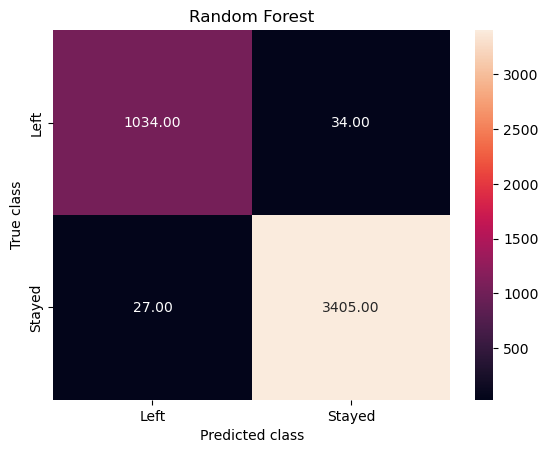

In [61]:
y_pred = model_rf.predict(X_test)

from sklearn.metrics import confusion_matrix

forest_cm = confusion_matrix(y_pred, y_test, labels=[1,0])

sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

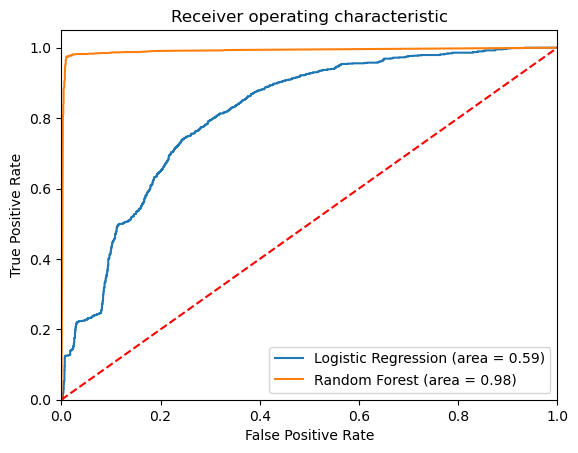

In [62]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#logistics
logit_roc_auc = roc_auc_score(y_test, model_logistic.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model_logistic.predict_proba(X_test)[:,1])
# Random Forest
rf_roc_auc = roc_auc_score(y_test, model_rf.predict(X_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, model_rf.predict_proba(X_test)[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

In [63]:
model_rf.feature_importances_

array([0.50672563, 0.18570288, 0.2621233 , 0.0154514 , 0.00248752,
       0.0030934 , 0.00301424, 0.00329472, 0.0123457 , 0.00576122])

In [64]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = model_rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}    -> {:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

promotion_last_5years    -> 0.25%
department_hr    -> 0.30%
department_RandD    -> 0.31%
department_management    -> 0.33%
salary_low    -> 0.58%
salary_high    -> 1.23%
Work_accident    -> 1.55%
last_evaluation    -> 18.57%
time_spend_company    -> 26.21%
satisfaction_level    -> 50.67%
